<h2> DATA COLLECTION <h2>

In [1]:
# Uncomment if you are using google colab
#!pip install stats   

In [2]:
# Uncomment if you are using google colab
# !pip install statsmodels   

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics

from pyclustering.cluster.silhouette import silhouette_ksearch
from scipy.stats import shapiro, mannwhitneyu, kruskal, chi2_contingency, spearmanr
from decimal import Decimal
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
filename = input("Enter the CSV filename (default: dataset_project_eHealth20242025.csv): ") or "dataset_project_eHealth20242025.csv"
df = pd.read_csv(filename)
df.head()

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              160 non-null    int64  
 1   gender           158 non-null    float64
 2   education        160 non-null    int64  
 3   marital          159 non-null    float64
 4   income           159 non-null    float64
 5   phq_1            159 non-null    float64
 6   phq_2            160 non-null    int64  
 7   phq_3            160 non-null    int64  
 8   phq_4            160 non-null    int64  
 9   phq_5            160 non-null    int64  
 10  phq_6            158 non-null    float64
 11  phq_7            160 non-null    int64  
 12  phq_8            160 non-null    int64  
 13  phq_9            159 non-null    float64
 14  gad_1            160 non-null    int64  
 15  gad_2            160 non-null    int64  
 16  gad_3            160 non-null    int64  
 17  gad_4           

In [6]:
df.shape[0] # Number of rows

160

In [7]:
df.shape[1] # Number of columns

93

<h4>Initially, the dataset has 160 rows and 93 columns.</h4>

<h2> DATA CLEANING <h2>

<h3> Processing rows <h3>

Duplicate rows will be removed first.

In [8]:
# Duplicate rows control
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

if len(duplicate_rows) > 0:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 10
Duplicate rows:
     age  gender  education  marital   income  phq_1  phq_2  phq_3  phq_4  \
150   31     0.0          8      0.0  34000.0    0.0      2      1      2   
151   70     3.0         13      4.0  22000.0    0.0      3      1      3   
152   52     1.0         13      1.0  44000.0    1.0      0      0      1   
153   37     1.0         22      1.0  65000.0    0.0      0      0      0   
154   36     1.0         18      1.0  63000.0    0.0      1      0      1   
155   80     2.0         18      3.0  18000.0    1.0      2      1      3   
156   19     2.0          8      0.0  30000.0    2.0      0      0      0   
157   26     3.0         18      0.0  39000.0    2.0      2      3      3   
158   46     1.0         22      1.0  57000.0    0.0      0      1      0   
159   46     0.0         25      1.0  61000.0    0.0      0      0      0   

     phq_5  ...  ssba_drug_3  ssba_drug_4  ssba_alcohol_1  ssba_alcohol_2  \
150      3  ...            3  

In [9]:
# Remove duplicates
df= df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 150


<h4>Now the dataset has 150 rows and 93 columns.</h4>

Creation of a new dataset called df_new.

In [10]:
df_new = df.copy()

Deletion of rows containing at least one null value (NaN) in the columns ranging from phq_1 to phq_9, as the final questionnaire score would otherwise be incomplete.

In [11]:
df_new = df_new.dropna(subset=[f'phq_{i}' for i in range(1, 10)])

Deletion of rows containing at least one null value (NaN) in the columns ranging from gad_1 to gad_9, as the final questionnaire score would otherwise be incomplete.

In [12]:
df_new = df_new.dropna(subset=[f'gad_{i}' for i in range(1, 8)])

Deletion of rows containing at least one null value (NaN) in the columns from ssba_1 to ssba_4, as the final questionnaire score would be incomplete.

In [13]:
df_new = df_new.dropna(subset=[f'ssba_internet_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_drug_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_alcohol_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_gambling_{i}' for i in range(1, 5)])

In [14]:
df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,52,1.0,13,1.0,44000.0,1.0,0,0,1,1,...,0,1,1,0,0,2.0,1.0,0.0,0.0,0.0
145,51,0.0,18,1.0,68000.0,0.0,0,1,0,0,...,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0
146,32,1.0,13,0.0,38000.0,3.0,2,0,3,1,...,0,3,0,1,0,0.0,0.0,0.0,0.0,0.0
148,45,2.0,18,1.0,59000.0,1.0,1,0,0,0,...,1,0,1,0,0,0.0,0.0,2.0,0.0,0.0


<h4>A new dataset (df_new) has been obtained, consisting of 137 rows and 93 columns.<h4>

<h3> Processing columns <h3>

To analyze depression, the total score of the questionnaire will be calculated. Specifically, the scores from the columns phq_1 to phq_9 will be summed for each record. Subsequently, the columns phq_1 to phq_9 will be removed.

In [15]:
df_new['phq_tot'] = df_new.loc[:, 'phq_1':'phq_9'].sum(axis=1)
df_new = df_new.drop(columns=[f'phq_{i}' for i in range(1, 10)])
df_new.head()

,age,gender,education,marital,income,gad_1,gad_2,gad_3,gad_4,gad_5,...,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot
0,18,2.0,13,0.0,38000.0,0,0,3,1,3.0,...,1,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0
1,62,1.0,5,1.0,22000.0,0,0,0,0,0.0,...,0,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0
2,31,1.0,13,0.0,33000.0,3,1,3,3,3.0,...,4,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0
3,76,3.0,8,4.0,10000.0,0,0,0,0,1.0,...,2,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0
4,19,2.0,8,0.0,30000.0,3,3,0,3,3.0,...,0,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0


To analyze anxiety, the total score of the questionnaire will be calculated. Specifically, the scores from the columns gad_1 to gad_7 will be summed for each record. Subsequently, the columns gad_1 to gad_7 will be removed.

In [16]:
df_new['gad_tot'] = df_new.loc[:, 'gad_1':'gad_7'].sum(axis=1)
df_new = df_new.drop(columns=[f'gad_{i}' for i in range(1, 8)])
df_new.head()

,age,gender,education,marital,income,asrs_1,asrs_2,asrs_3,asrs_4,asrs_5,...,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot
0,18,2.0,13,0.0,38000.0,1,1,2.0,0,1,...,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0
1,62,1.0,5,1.0,22000.0,3,3,0.0,1,1,...,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0
2,31,1.0,13,0.0,33000.0,0,0,2.0,0,2,...,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0
3,76,3.0,8,4.0,10000.0,2,2,1.0,2,0,...,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0
4,19,2.0,8,0.0,30000.0,0,2,0.0,0,1,...,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0


The focus is not on individuals with ADHD or ASD; therefore, the columns from asrs_1 to asrs_6 and from asq_1 to asq_50 will be removed.

In [17]:
df_new = df_new.drop(columns=[f'asrs_{i}' for i in range(1, 7)])
df_new = df_new.drop(columns=[f'asq_{i}' for i in range(1, 51)])
df_new.head()

,age,gender,education,marital,income,ssba_internet_1,ssba_internet_2,ssba_internet_3,ssba_internet_4,ssba_drug_1,...,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot
0,18,2.0,13,0.0,38000.0,4,3,4,4.0,0.0,...,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0
1,62,1.0,5,1.0,22000.0,1,2,0,0.0,0.0,...,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0
2,31,1.0,13,0.0,33000.0,3,0,2,0.0,4.0,...,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0
3,76,3.0,8,4.0,10000.0,0,1,0,0.0,0.0,...,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0
4,19,2.0,8,0.0,30000.0,3,4,4,4.0,4.0,...,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0


The focus will now shift to addictions.

In [18]:
# The columns related to internet addiction will be summed to calculate a total score
df_new['ssba_internet_tot'] = df_new.loc[:, 'ssba_internet_1':'ssba_internet_4'].sum(axis=1)
df_new = df_new.drop(columns=[f'ssba_internet_{i}' for i in range(1, 5)])

In [19]:
# The columns related to drug addiction will be summed to calculate a total score
df_new['ssba_drug_tot'] = df_new.loc[:, 'ssba_drug_1':'ssba_drug_4'].sum(axis=1)
df_new = df_new.drop(columns=[f'ssba_drug_{i}' for i in range(1, 5)])

In [20]:
# The columns related to alcohol addiction will be summed to calculate a total score
df_new['ssba_alcohol_tot'] = df_new.loc[:, 'ssba_alcohol_1':'ssba_alcohol_4'].sum(axis=1)
df_new = df_new.drop(columns=[f'ssba_alcohol_{i}' for i in range(1, 5)])

In [21]:
# The columns related to gambling addiction will be summed to calculate a total score
df_new['ssba_gambling_tot'] = df_new.loc[:, 'ssba_gambling_1':'ssba_gambling_4'].sum(axis=1)
df_new = df_new.drop(columns=[f'ssba_gambling_{i}' for i in range(1, 5)])

In [22]:
df_new

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
144,52,1.0,13,1.0,44000.0,4.0,0.0,0.0,1.0,3.0,1.0
145,51,0.0,18,1.0,68000.0,1.0,4.0,0.0,0.0,1.0,1.0
146,32,1.0,13,0.0,38000.0,16.0,12.0,13.0,9.0,1.0,0.0
148,45,2.0,18,1.0,59000.0,4.0,1.0,3.0,3.0,1.0,2.0


<h4>A new dataset (df_new) has been obtained, consisting of 137 rows and 11 columns.<h4>

<h2>EXPLORATORY DATA ANALYSIS<h2>

<h3> Univariate Data Analysis <h3>

<h4>Shapiro-Wilk Test</h4>

The *Shapiro-Wilk test* is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.

This statistical tool is straightforward and effective for performing normality checks. However, it has a limitation: it does not perform well with large datasets. The maximum dataset size depends on the specific implementation, but in Python, sample sizes exceeding 5,000 provide only an approximate calculation of the p-value.

https://builtin.com/data-science/shapiro-wilk-test

shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)

Perform the Shapiro-Wilk test for normality.
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Parameters: 

- x -> array_like: array of sample data. Must contain at least three observations.

- axis -> int or None, default: None. If an int, the axis of the input along which to compute the statistic. The statistic of each axis-slice (e.g. row) of the input will appear in a corresponding element of the output. If None, the input will be raveled before computing the statistic.

- nan_policy -> {‘propagate’, ‘omit’, ‘raise’}. Defines how to handle input NaNs. (propagate: if a NaN is present in the axis slice (e.g. row) along which the statistic is computed, the corresponding entry of the output will be NaN; omit: NaNs will be omitted when performing the calculation. If insufficient data remains in the axis slice along which the statistic is computed, the corresponding entry of the output will be NaN; raise: if a NaN is present, a ValueError will be raised).

- keepdims -> bool, default: False. If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

Returns:

- statistic (float) -> The test statistic.

- p-value (float) -> The p-value for the hypothesis test.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [23]:
df_new.describe()

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
count,137.000000,135.000000,137.000000,136.000000,136.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,46.700730,1.407407,13.306569,1.595588,35520.580882,10.832117,6.912409,4.569343,4.540146,4.080292,4.321168
std,18.266558,1.115001,5.987195,1.555771,17343.514658,6.730712,7.143976,4.909169,4.986769,4.232331,4.563175
min,18.000000,0.000000,5.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,8.000000,1.000000,21000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,45.000000,1.000000,13.000000,1.000000,32500.000000,13.000000,3.000000,3.000000,2.000000,3.000000,2.000000
75%,62.000000,2.000000,18.000000,2.250000,51250.000000,16.000000,14.000000,8.000000,8.000000,5.000000,6.000000
max,80.000000,3.000000,25.000000,5.000000,69000.000000,20.000000,21.000000,16.000000,16.000000,16.000000,16.000000


<h5>Age distribution</h5>

The age distribution will be analyzed.

Statistics: 0.9481272477336217
P-value: 5.195895718527797e-05
Data do not follow a normal distribution.


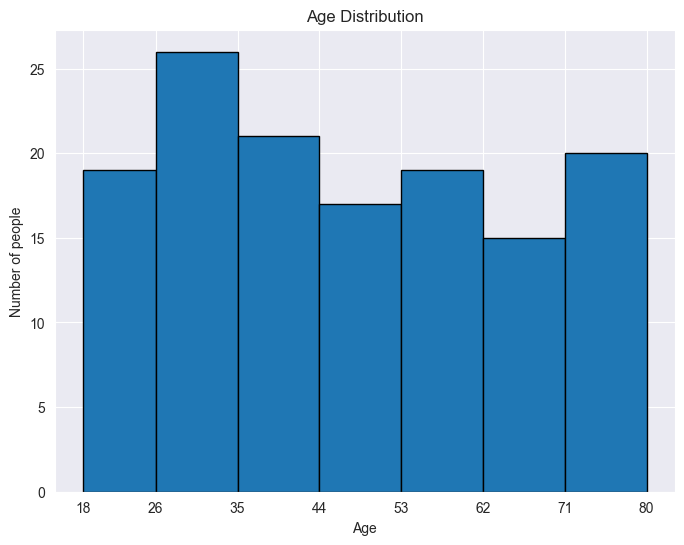

In [24]:
# Check for normality distribution
stat, p = shapiro(df_new['age'])
print(f"Statistics: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")

# Equal intervals will be created within the range of 18 to 80 (minimum and maximum values).
bins = np.linspace(18, 80, 8).astype(int)  # 7 intervals

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df_new['age'], bins=bins, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.xticks(bins)
plt.grid(True)
plt.show()

In the dataset, most individuals fall within the age range of 26 to 35 years, followed by those aged 35 to 44 and 71 to 80 years.

<h5>Gender distribution</h5>

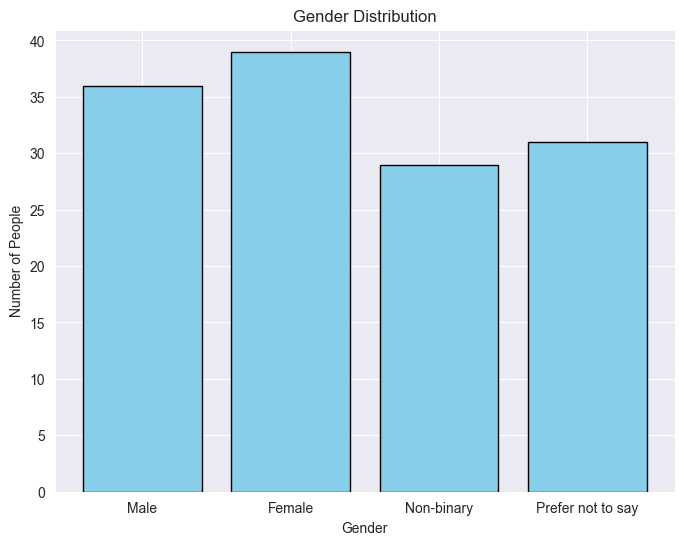

In [25]:
labels = ['Male', 'Female', 'Non-binary', 'Prefer not to say']
gender_counts = df_new['gender'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, gender_counts, color='skyblue', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.grid(True, axis='y')
plt.show()

The chart shows a slight majority of females, followed by males, and then individuals who prefer not to specify their gender.

<h5>Education distribution</h5>

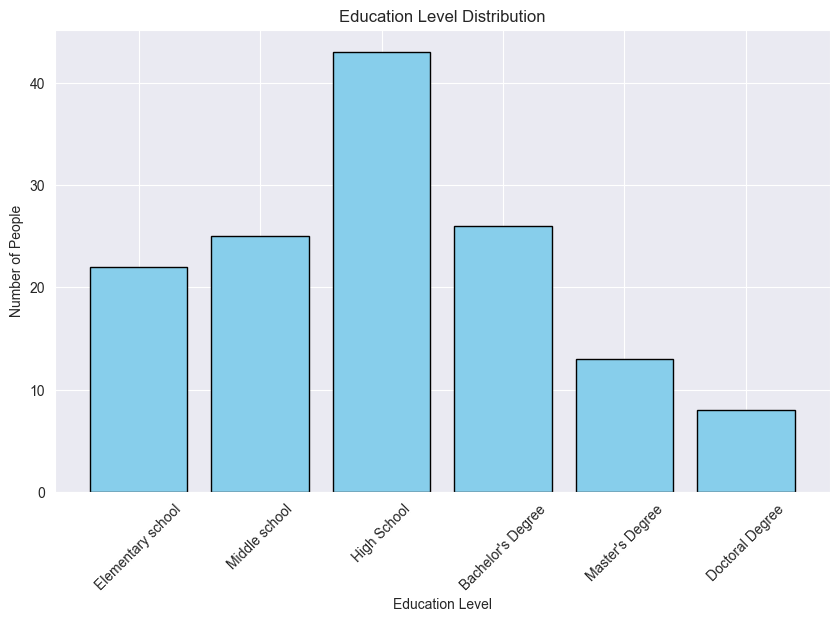

In [26]:
labels = ['Elementary school', 'Middle school', 'High School',
          "Bachelor's Degree", "Master's Degree", 'Doctoral Degree']
education_counts = df_new['education'].value_counts().reindex([5, 8, 13, 18, 22, 25], fill_value=0)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, education_counts, color='skyblue', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

The chart reveals a clear predominance of individuals with a high school diploma, followed by those with a bachelor's degree and those whose education ended at middle school.

<h5>Marital status distribution</h5>

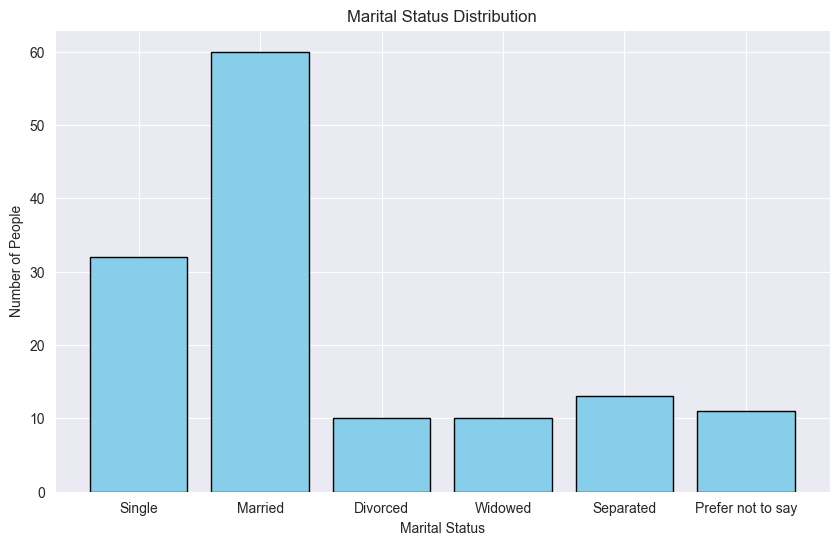

In [27]:
labels = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']
marital_counts = df_new['marital'].value_counts().reindex([0, 1, 2, 3, 4, 5], fill_value=0)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, marital_counts, color='skyblue', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')
plt.grid(True, axis='y')
plt.show()

The chart displays a clear predominance of married individuals, followed by a smaller proportion of single individuals.

<h5>Income distribution</h5>

Statistics: 0.9308706651757072
P-value: 3.189948520876075e-06
Data do not follow a normal distribution.


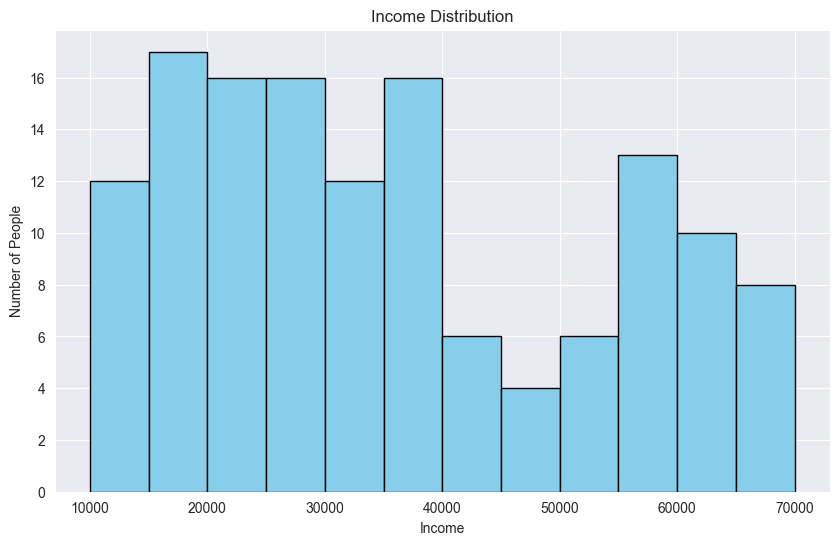

In [28]:
income_min = df_new['income'].min()
income_max = df_new['income'].max()
bins = np.arange(income_min, income_max + 5000, 5000)

df_new = df_new.dropna(subset=['income'])

# Check for normality distribution
stat, p = shapiro(df_new['income'])
print(f"Statistics: {stat}")
print(f"P-value: {p}")
if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")

# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(df_new['income'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True)
plt.show()

<h5>People distribution for depression (PHQ-9)</h5>

Statistics: 0.8816415036228654
P-value: 5.135006526730392e-09
Data do not follow a normal distribution.


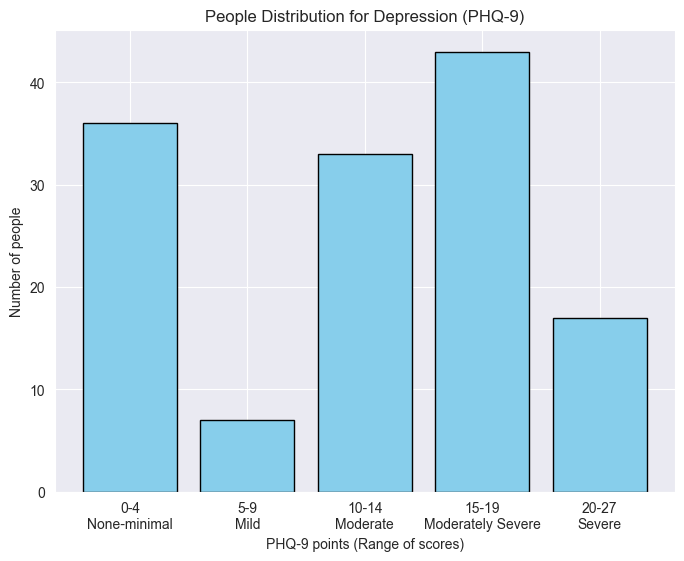

In [29]:
# Check for normality distribution
stat, p = shapiro(df_new['phq_tot'])
print(f"Statistics: {stat}")
print(f"P-value: {p}")
if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")

# The bin edges and corresponding labels for the intervals of the PHQ-9 depression scores are defined
bins = [0, 4, 9, 14, 19, 27]
labels = ['0-4\nNone-minimal', '5-9\nMild', '10-14\nModerate', '15-19\nModerately Severe', '20-27\nSevere']

# The number of individuals falling into each interval of PHQ-9 scores is counted
counts, _ = np.histogram(df_new['phq_tot'], bins=bins)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.title('People Distribution for Depression (PHQ-9)')
plt.xlabel('PHQ-9 points (Range of scores)')
plt.ylabel('Number of people')
plt.grid(True, axis='y')
plt.show()

The chart illustrates the distribution of individuals based on their PHQ-9 depression scores, which categorize the severity of depression into five levels:

- 0-4 (None-minimal): this is the second-largest category, with approximately 40 individuals showing little to no signs of depression;
- 5-9 (Mild): this represents the smallest group, with fewer than 10 individuals classified under mild depression;
- 10-14 (Moderate): around 35 individuals fall into this category, indicating symptoms of moderate depression;
- 15-19 (Moderately severe): the largest group, with over 45 individuals, shows moderately severe depression, highlighting a significant prevalence of serious depressive symptoms;
- 20-27 (Severe): slightly more than 15 individuals are categorized in the severe depression range, representing the group with the most critical symptoms.

<h5>People distribution for anxiety (GAD-7)</h5>

Statistics: 0.7913852834388728
P-value: 1.2393169147966244e-12
Data do not follow a normal distribution.


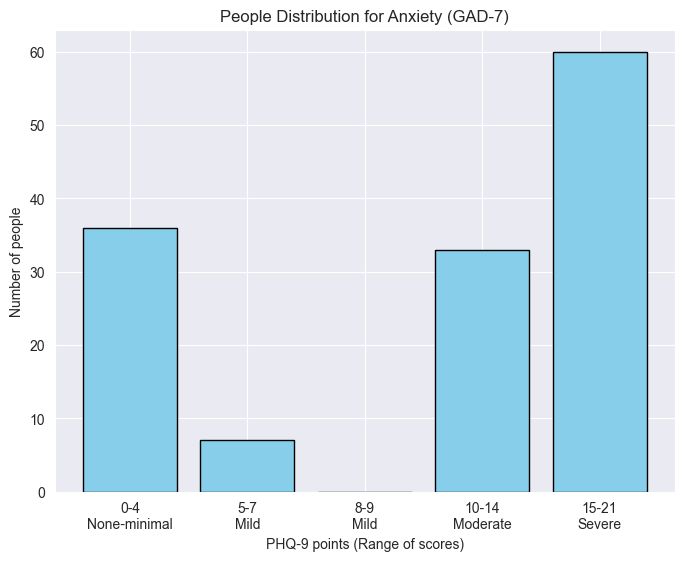

In [30]:
# Check for normality distribution
stat, p = shapiro(df_new['gad_tot'])
print(f"Statistics: {stat}")
print(f"P-value: {p}")
if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")

# The bin edges and corresponding labels for the intervals are defined
bins = [0, 4, 7, 9, 14, 21]
labels = ['0-4\nNone-minimal', '5-7\nMild', '8-9\nMild', '10-14\nModerate', '15-21\nSevere']

# The number of individuals falling into each interval of GAD-7 scores is counted
counts, _ = np.histogram(df_new['phq_tot'], bins=bins)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.title('People Distribution for Anxiety (GAD-7)')
plt.xlabel('PHQ-9 points (Range of scores)')
plt.ylabel('Number of people')
plt.grid(True, axis='y')
plt.show()

This chart illustrates the distribution of individuals based on their GAD-7 anxiety scores, which assess the severity of generalized anxiety disorder (GAD). The scores are categorized into five levels of anxiety severity:
- 0-4 (None-minimal): this is the second-largest group, with approximately 40 individuals showing little to no symptoms of anxiety;
- 5-7 (Mild): a much smaller group, with fewer than 10 individuals, falls within this mild anxiety category;
- 8-9 (Mild): another small group, likely consisting of just one person, is categorized within this range;
- 10-14 (Moderate): around 20 individuals exhibit moderate anxiety symptoms, indicating notable levels of distress without reaching the severe threshold;
- 15-21 (Severe): the largest group, comprising over 60 individuals, falls into the severe anxiety category, highlighting a significant portion of the dataset experiencing high levels of anxiety according to the GAD-7 measure.


This distribution underscores the prevalence of severe anxiety within the dataset.

<h5>Addiction distribution</h5>

Internet addiction statistics: 0.8062583745541563
Internet addiction p-value: 4.024133079675348e-12
Data (internet addiction) do not follow a normal distribution.

Drug addiction statistics: 0.7953224054546983
Drug addiction p-value: 1.6829705682554605e-12
Data (drug addiction) do not follow a normal distribution.

Alcohol addiction statistics: 0.8208219458364499
Alcohol addiction p-value: 1.3558183212328789e-11
Data (alcohol addiction) do not follow a normal distribution.

Gambling addiction statistics: 0.8111627841056508
Gambling addiction p-value: 6.014737862388939e-12
Data (gambling addiction) do not follow a normal distribution.



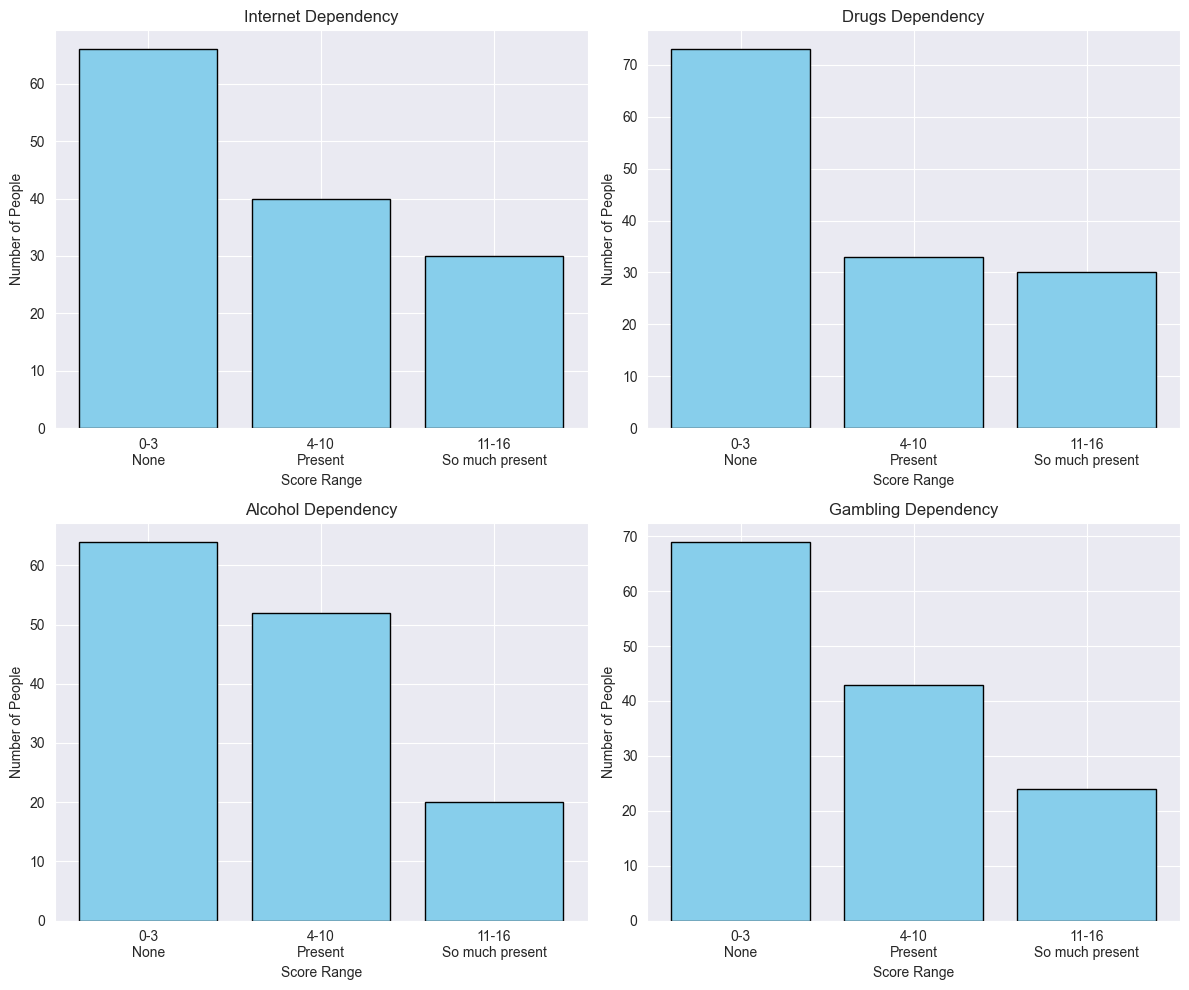

In [31]:
# Check for normality distribution
stat, p = shapiro(df_new['ssba_internet_tot'])
print(f"Internet addiction statistics: {stat}")
print(f"Internet addiction p-value: {p}")
if p < 0.05:
    print("Data (internet addiction) do not follow a normal distribution.\n")
else:
    print("Data (internet addiction) follow a normal distribution.\n")

stat, p = shapiro(df_new['ssba_drug_tot'])
print(f"Drug addiction statistics: {stat}")
print(f"Drug addiction p-value: {p}")
if p < 0.05:
    print("Data (drug addiction) do not follow a normal distribution.\n")
else:
    print("Data (drug addiction) follow a normal distribution.\n")
    
stat, p = shapiro(df_new['ssba_alcohol_tot'])
print(f"Alcohol addiction statistics: {stat}")
print(f"Alcohol addiction p-value: {p}")
if p < 0.05:
    print("Data (alcohol addiction) do not follow a normal distribution.\n")
else:
    print("Data (alcohol addiction) follow a normal distribution.\n")

stat, p = shapiro(df_new['ssba_gambling_tot'])
print(f"Gambling addiction statistics: {stat}")
print(f"Gambling addiction p-value: {p}")
if p < 0.05:
    print("Data (gambling addiction) do not follow a normal distribution.\n")
else:
    print("Data (gambling addiction) follow a normal distribution.\n")

# The bin edges and labels for the addictions are defined
bins = [0, 3, 10, 16]
labels = ['0-3\nNone', '4-10\nPresent', '11-16\nSo much present']

# List of column names for each addiction type with their corresponding titles
addictions = {
    'Internet': 'ssba_internet_tot',
    'Drugs': 'ssba_drug_tot',
    'Alcohol': 'ssba_alcohol_tot',
    'Gambling': 'ssba_gambling_tot'
}

# Figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots

# Iteration through each addiction to create a separate bar chart
for ax, (addiction_name, column_name) in zip(axs.flatten(), addictions.items()):
    # The number of individuals falling into each interval for the specific addiction is counted
    counts, _ = np.histogram(df_new[column_name], bins=bins)

    # Bar chart for the current addiction
    ax.bar(labels, counts, color='skyblue', edgecolor='black')
    ax.set_title(f'{addiction_name} Dependency')
    ax.set_xlabel('Score Range')
    ax.set_ylabel('Number of People')
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

<h3> Bivariate Analysis <h3>

<h4>Spearman's coefficient</h4>

spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')

Calculate a Spearman correlation coefficient with associated p-value.

The *Spearman rank-order correlation coefficient* is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value is a probability associated with the statistical test. Specifically, it represents the probability of observing a correlation value (in terms of strength and direction) at least as extreme as the one calculated from the data, assuming there is no correlation in the population (null hypothesis).

If the p-value is small (e.g., below a conventional threshold like 0.05), it indicates that it is highly unlikely to observe such a strong correlation (positive or negative) by chance in an uncorrelated system. This leads to rejecting the null hypothesis and concluding that there is likely a significant correlation between the two variables.

Parameters:
- a, b1D or 2D: array_like, b is optional

    One or two 1-D or 2-D arrays containing multiple variables and observations. When these are 1-D, each represents a vector of observations of a single variable. For the behavior in the 2-D case, see under axis, below. Both arrays need to have the same length in the axis dimension.

- axis: int or None, optional

    If axis=0 (default), then each column represents a variable, with observations in the rows. If axis=1, the relationship is transposed: each row represents a variable, while the columns contain observations. If axis=None, then both arrays will be raveled.

- nan_policy: {‘propagate’, ‘raise’, ‘omit’}, optional

    Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
        - ‘propagate’: returns nan
        - ‘raise’: throws an error
        - ‘omit’: performs the calculations ignoring nan values

- alternative: {‘two-sided’, ‘less’, ‘greater’}, optional

    Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:
        - ‘two-sided’: the correlation is nonzero
        - ‘less’: the correlation is negative (less than zero)
        - ‘greater’: the correlation is positive (greater than zero)

Returns: 

resSignificanceResult

An object containing attributes:
- statistic: float or ndarray (2-D square)

    Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters). Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.

- pvalue: float

    The p-value for a hypothesis test whose null hypothesis is that two samples have no ordinal correlation. See alternative above for alternative hypotheses. pvalue has the same shape as statistic.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

<h4>Kruskall-Wallis Test</h4>

kruskal(*samples, nan_policy='propagate', axis=0, keepdims=False)

Compute the Kruskal-Wallis H-test for independent samples.

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.
It is used when the data do not meet the assumptions required for ANOVA (such as normality and/or equality of variances).

Parameters:
- sample1, sample2, ...: array_like

    Two or more arrays with the sample measurements can be given as arguments. Samples must be one-dimensional.
    
- nan_policy: {‘propagate’, ‘omit’, ‘raise’}

    Defines how to handle input NaNs.
        - propagate: if a NaN is present in the axis slice (e.g. row) along which the statistic is computed, the corresponding entry of the output will be NaN.
        - omit: NaNs will be omitted when performing the calculation. If insufficient data remains in the axis slice along which the statistic is computed, the corresponding entry of the output will be NaN.
        - raise: if a NaN is present, a ValueError will be raised.
        
- axis: int or None, default: 0

    If an int, the axis of the input along which to compute the statistic. The statistic of each axis-slice (e.g. row) of the input will appear in a corresponding element of the output. If None, the input will be raveled before computing the statistic.

- keepdims: bool, default: False

    If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

Returns:
- statistic: float

    The Kruskal-Wallis H statistic, corrected for ties.
- pvalue: float

    The p-value for the test using the assumption that H has a chi square distribution. The p-value returned is the survival function of the chi square distribution evaluated at H.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

<h5>Age</h5>

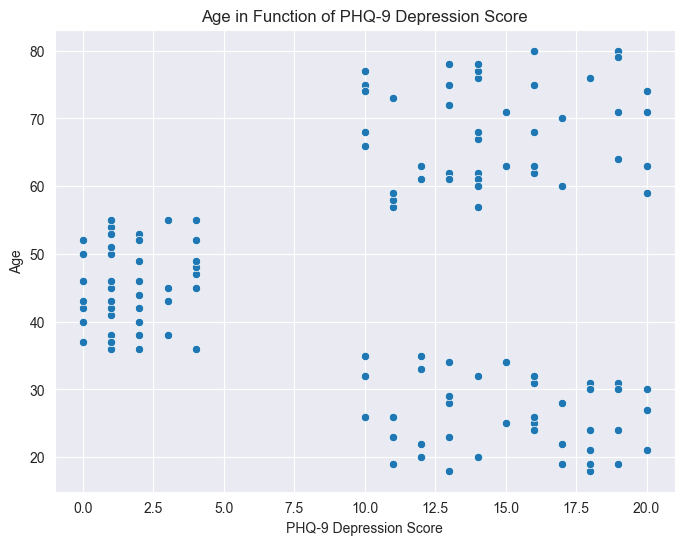

Spearman's coefficient: -0.047, p-value: 0.589


In [32]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['age'])
plt.title('Age in Function of PHQ-9 Depression Score')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Since none of the variables follow a normal distribution, the Spearman correlation will be used.
spearman_corr, spearman_p_value = spearmanr(df_new['phq_tot'], df_new['age'])
print(f"Spearman's coefficient: {spearman_corr:.3f}, p-value: {spearman_p_value:.3f}")

- Young People (20-35): there are individuals with both mild and severe levels of depression.
- Adults (30-50): many individuals seem to have lower depression scores (between 0 and 5). 
- Elderly (60 and above): PHQ-9 scores tend to be higher, which might indicate a trend toward more severe levels of depression among older individuals.

The Spearman's coefficient between depression (PHQ-9 score) and age is -0.047. This indicates a very weak negative monotonic relationship between these two variables, meaning that as one variable increases, the other tends to slightly decrease, but the effect is extremely small. The p-value is 0.589, which is much higher than the common significance level of 0.05. So, the correlation is not statistically significant.



<h5>Gender</h5>

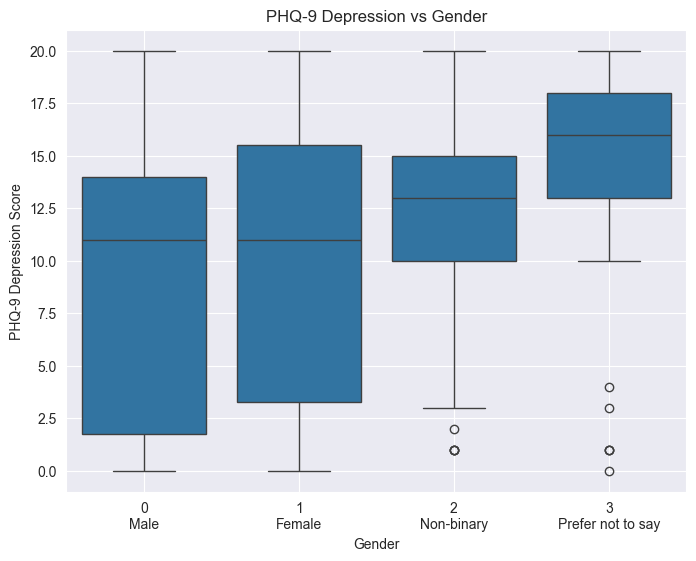

Kruskal-Wallis Test: H-statistic = 9.197, p-value = 2.678e-02
There is a statistically significant difference in PHQ-9 scores between gender groups.


In [33]:
# Box plot to compare depression scores with gender categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['gender'], y=df_new['phq_tot'])
plt.xticks([0, 1, 2, 3], ['0\nMale', '1\nFemale', '2\nNon-binary', '3\nPrefer not to say'])
plt.title('PHQ-9 Depression vs Gender')
plt.xlabel('Gender')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

# Filtering groups with at least two valid values to ensure only groups with sufficient data are included in the test
valid_groups = [gender for gender in df_new['gender'].unique()
                if df_new[df_new['gender'] == gender]['phq_tot'].dropna().shape[0] > 1]

# Extracting PHQ-9 scores for valid groups
filtered_groups = [df_new[df_new['gender'] == gender]['phq_tot'].dropna() for gender in valid_groups]

# Perform the Kruskal-Wallis test on valid groups in order to compare the distribution of PHQ-9 scores across gender groups
if len(filtered_groups) > 1:
    stat, p_value = kruskal(*filtered_groups)
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a statistically significant difference in PHQ-9 scores between gender groups.")
    else:
        print("No statistically significant difference in PHQ-9 scores between gender groups.")
else:
    print("Not enough valid groups for Kruskal-Wallis Test.")  # Test can't be run

The Kruskal-Wallis test indicates a statistically significant difference in PHQ-9 depression scores across gender groups (H = 9.197, p = 0.0268). This suggests that at least one gender group differs significantly in its depression score distribution from the others.

<h5>Education</h5>

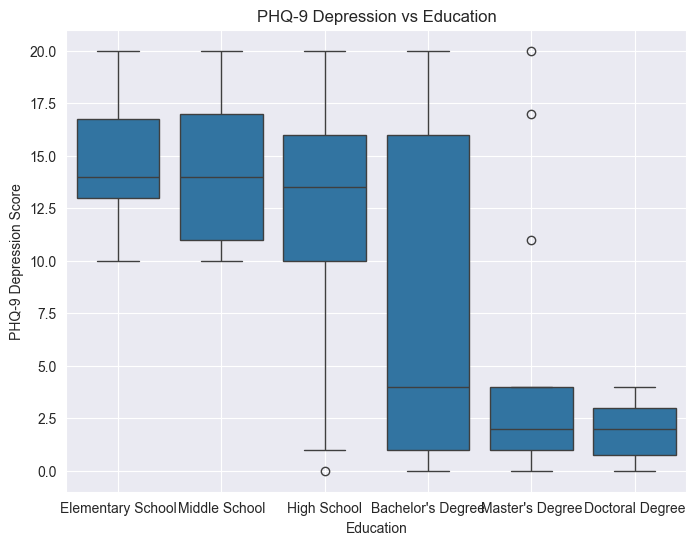

Kruskal-Wallis Test: H-statistic = 29.906, p-value = 1.539e-05
There is a statistically significant difference in PHQ-9 scores between education groups.


In [34]:
# Box plot to compare depression scores with education categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['education'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3, 4, 5], ['Elementary School', 'Middle School', 'High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'Doctoral Degree'])

plt.title('PHQ-9 Depression vs Education')
plt.xlabel('Education')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

valid_groups = [education for education in df_new['education'].unique()
                if df_new[df_new['education'] == education]['phq_tot'].dropna().shape[0] > 1]
filtered_groups = [df_new[df_new['education'] == education]['phq_tot'].dropna() for education in valid_groups]
if len(filtered_groups) > 1:
    stat, p_value = kruskal(*filtered_groups)
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a statistically significant difference in PHQ-9 scores between education groups.")
    else:
        print("No statistically significant difference in PHQ-9 scores between education groups.")
else:
    print("Not enough valid groups for Kruskal-Wallis Test.")

The Kruskal-Wallis test shows a statistically significant difference in PHQ-9 depression scores across education levels (H = 29.906, p = 0.000015). This indicates that at least one education group has a significantly different depression score distribution compared to the others.

<h5>Marital status</h5>

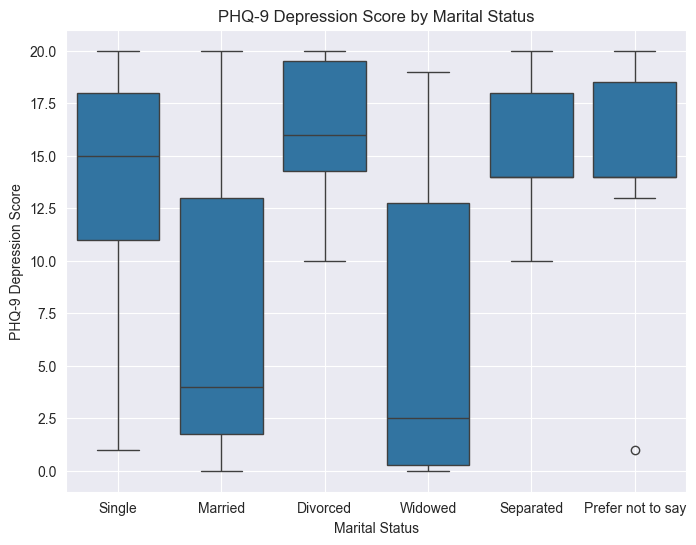

Kruskal-Wallis Test: H-statistic = 37.828, p-value = 4.085e-07
There is a statistically significant difference in PHQ-9 scores between marital status groups.


In [35]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['marital'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say'])

plt.title('PHQ-9 Depression Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

valid_groups = [marital for marital in df_new['marital'].unique()
                if df_new[df_new['marital'] == marital]['phq_tot'].dropna().shape[0] > 1]
filtered_groups = [df_new[df_new['marital'] == marital]['phq_tot'].dropna() for marital in valid_groups]
if len(filtered_groups) > 1:
    stat, p_value = kruskal(*filtered_groups)
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a statistically significant difference in PHQ-9 scores between marital status groups.")
    else:
        print("No statistically significant difference in PHQ-9 scores between marital status groups.")
else:
    print("Not enough valid groups for Kruskal-Wallis Test.")

The Kruskal-Wallis test indicates a statistically significant difference in PHQ-9 depression scores across marital status groups (H = 37.828, p = 4.085e-07). This suggests that at least one marital status group has a depression score distribution significantly different from the others.

<h5>Income</h5>

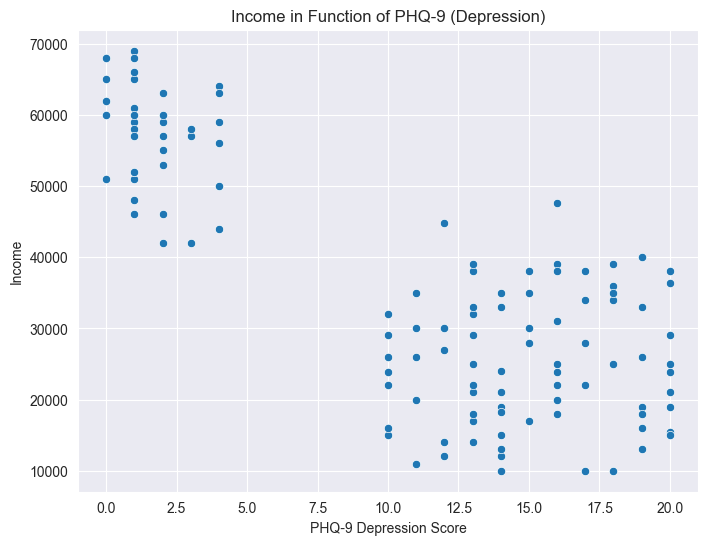

Spearman's coefficient: -0.604, p-value = 6.956e-15


In [36]:
# Scatter plot between PHQ-9 (depression) and income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['income'])
plt.title('Income in Function of PHQ-9 (Depression)')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Income')
plt.grid(True)
plt.show()

df_cleaned = df_new[['phq_tot', 'income']].dropna()
# Since we've checked that our datat is not normal we use the spearman test
spearman_corr_income, spearman_p_value = stats.spearmanr(df_new['phq_tot'], df_new['income'])
print(f"Spearman's coefficient: {spearman_corr_income:.3f}, p-value = {Decimal(spearman_p_value):.3e}")

The Spearman's coefficient between depression and income is -0.604, indicating a moderately strong negative monotonic relationship. This suggests that as income decreases, depression scores tend to increase. The p-value is extremely small, meaning this correlation is statistically significant.

<h5>Anxiety</h5>

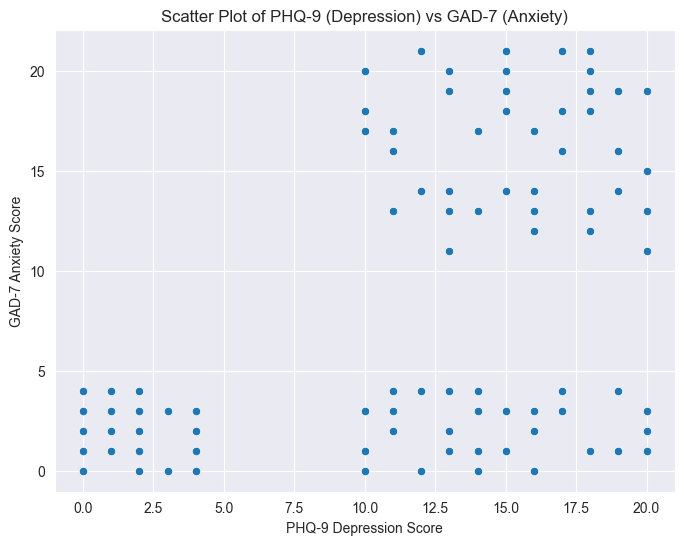

Spearman's coefficient: 0.343, p-value = 4.34e-5


In [37]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['gad_tot'])
plt.title('Scatter Plot of PHQ-9 (Depression) vs GAD-7 (Anxiety)')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('GAD-7 Anxiety Score')
plt.grid(True)
plt.show()

spearman_corr_gad, spearman_p_value = spearmanr(df_new['phq_tot'], df_new['gad_tot'])
print(f"Spearman's coefficient: {spearman_corr_gad:.3f}, p-value = {Decimal(spearman_p_value):.2e}")

The Spearman's coefficient of 0.343 suggests a moderate positive monotonic relationship between depression and anxiety. The p-value indicates that this correlation is statistically significant, with strong evidence against the null hypothesis of no relationship.

<h5>Addictions</h5>

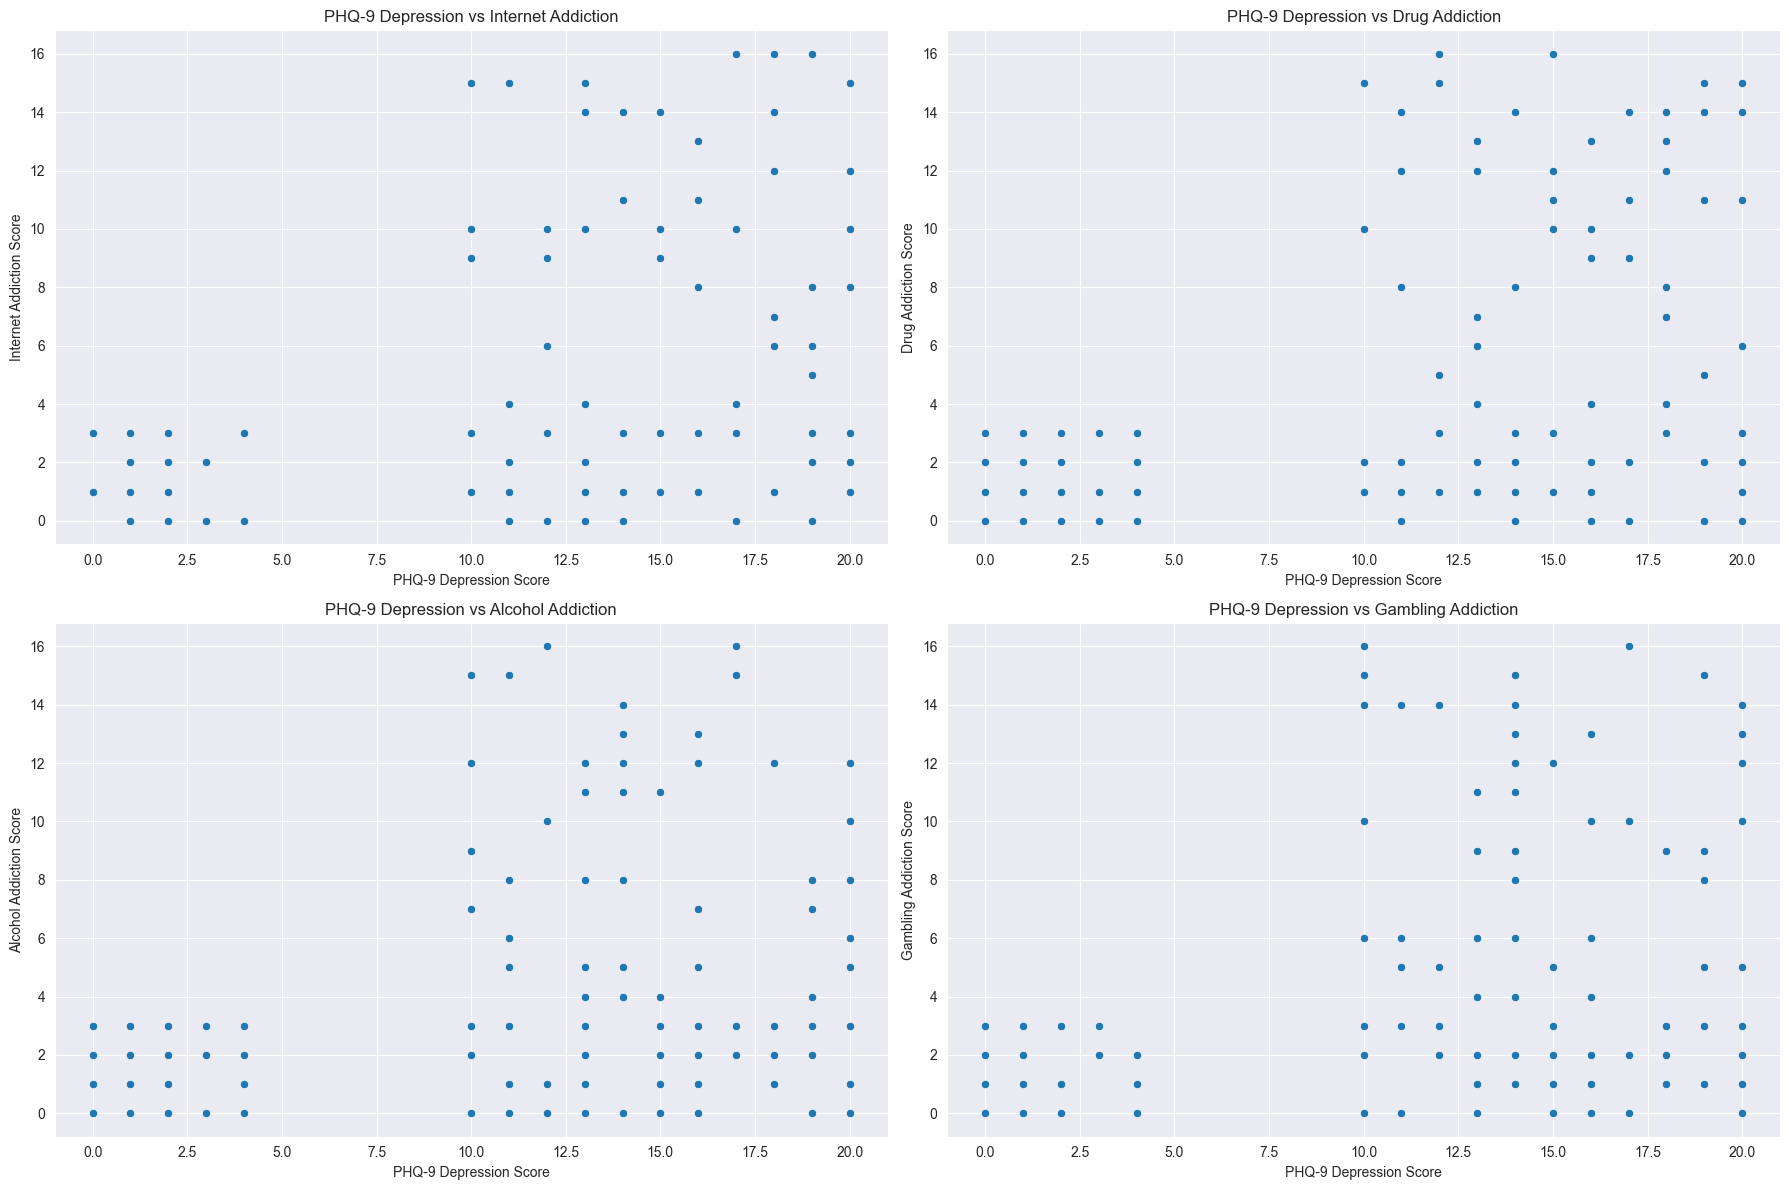

Internet Addiction: Spearman Coefficient = 0.388, p-value = 3.13e-6
Drug Addiction: Spearman Coefficient = 0.377, p-value = 6.03e-6
Alcohol Addiction: Spearman Coefficient = 0.304, p-value = 3.15e-4
Gambling Addiction: Spearman Coefficient = 0.330, p-value = 8.55e-5


In [38]:
# List of addictions and titles
addictions = ['ssba_internet_tot', 'ssba_drug_tot', 'ssba_alcohol_tot', 'ssba_gambling_tot']
addiction_titles = ['Internet Addiction', 'Drug Addiction', 'Alcohol Addiction', 'Gambling Addiction']

# Correlation results
correlation_results = {}

# Create scatter plot with PHQ-9 Depression on the x-axis
plt.figure(figsize=(18, 12))

for i, addiction in enumerate(addictions):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df_new['phq_tot'], y=df_new[addiction])
    plt.title(f'PHQ-9 Depression vs {addiction_titles[i]}')
    plt.xlabel('PHQ-9 Depression Score')
    plt.ylabel(f'{addiction_titles[i]} Score')

    # Calculate Pearson correlation
    spearman_corr, spearman_p_value = spearmanr(df_new['phq_tot'], df_new[addiction]) 
    correlation_results[addiction_titles[i]] = {
    'Method': 'Spearman',
    'Coefficient': spearman_corr,
    'p-value': Decimal(spearman_p_value)
}

plt.tight_layout()
plt.show()

for addiction, result in correlation_results.items():
    print(f"{addiction}: {result['Method']} Coefficient = {result['Coefficient']:.3f}, p-value = {result['p-value']:.2e}")

The results show statistically significant positive correlations between PHQ-9 (depression) and all types of addictions. Internet Addiction has the strongest correlation (Spearman's coefficient = 0.388, p-value = 3.13e-6), followed by Drug Addiction (0.377), Gambling Addiction (0.330), and Alcohol Addiction (0.304). These findings suggest that higher depression scores are moderately associated with higher addiction scores.

<h3>Multivariate Analysis<h3>

<Axes: >

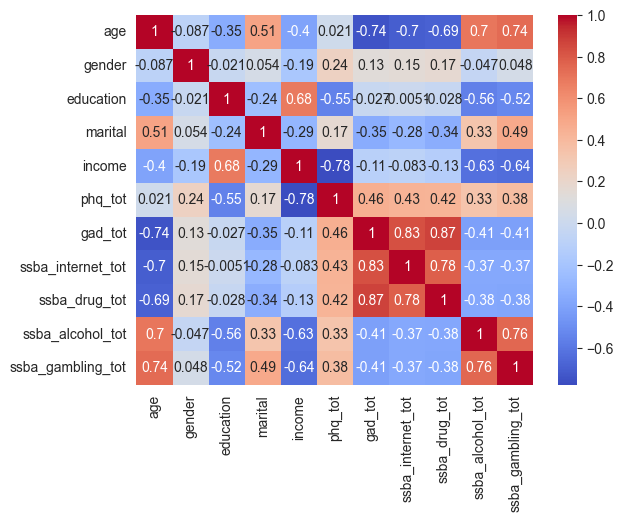

In [39]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

<h2>DATA ANALYSIS<h2>

<h3>Data Preparation<h3>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              160 non-null    int64  
 1   gender           158 non-null    float64
 2   education        160 non-null    int64  
 3   marital          159 non-null    float64
 4   income           159 non-null    float64
 5   phq_1            159 non-null    float64
 6   phq_2            160 non-null    int64  
 7   phq_3            160 non-null    int64  
 8   phq_4            160 non-null    int64  
 9   phq_5            160 non-null    int64  
 10  phq_6            158 non-null    float64
 11  phq_7            160 non-null    int64  
 12  phq_8            160 non-null    int64  
 13  phq_9            159 non-null    float64
 14  gad_1            160 non-null    int64  
 15  gad_2            160 non-null    int64  
 16  gad_3            160 non-null    int64  
 17  gad_4           

In [67]:
df_clusters = df.copy()

# Rows with null values in the required columns will be dropped
df_clusters = df_clusters.dropna(subset=['gender', 'marital', 'income'])
df_clusters = df_clusters.dropna(subset=[f'phq_{i}' for i in range(1, 10)])
df_clusters = df_clusters.dropna(subset=[f'gad_{i}' for i in range(1, 8)])
df_clusters = df_clusters.dropna(subset=[f'ssba_internet_{i}' for i in range(1, 5)])
df_clusters = df_clusters.dropna(subset=[f'ssba_drug_{i}' for i in range(1, 5)])
df_clusters = df_clusters.dropna(subset=[f'ssba_alcohol_{i}' for i in range(1, 5)])
df_clusters = df_clusters.dropna(subset=[f'ssba_gambling_{i}' for i in range(1, 5)])

# Columns that are not relevant for the analysis will be removed
df_clusters = df_clusters.drop(columns=[f'asrs_{i}' for i in range(1, 7)])
df_clusters = df_clusters.drop(columns=[f'asq_{i}' for i in range(1, 51)])

# The columns containing PHQ scores will be summed
df_clusters['phq_tot'] = df_clusters.loc[:, 'phq_1':'phq_9'].sum(axis=1)
df_clusters = df_clusters.drop(columns=[f'phq_{i}' for i in range(1, 10)])

# The columns containing GAD scores will be summed
df_clusters['gad_tot'] = df_clusters.loc[:, 'gad_1':'gad_7'].sum(axis=1)
df_clusters = df_clusters.drop(columns=[f'gad_{i}' for i in range(1, 8)])

# The columns containing addiction scores will be summed
df_clusters['ssba_internet_tot'] = df_clusters.loc[:, 'ssba_internet_1':'ssba_internet_4'].sum(axis=1)
df_clusters = df_clusters.drop(columns=[f'ssba_internet_{i}' for i in range(1, 5)])

df_clusters['ssba_drug_tot'] = df_clusters.loc[:, 'ssba_drug_1':'ssba_drug_4'].sum(axis=1)
df_clusters = df_clusters.drop(columns=[f'ssba_drug_{i}' for i in range(1, 5)])

df_clusters['ssba_alcohol_tot'] = df_clusters.loc[:, 'ssba_alcohol_1':'ssba_alcohol_4'].sum(axis=1)
df_clusters = df_clusters.drop(columns=[f'ssba_alcohol_{i}' for i in range(1, 5)])

df_clusters['ssba_gambling_tot'] = df_clusters.loc[:, 'ssba_gambling_1':'ssba_gambling_4'].sum(axis=1)
df_clusters = df_clusters.drop(columns=[f'ssba_gambling_{i}' for i in range(1, 5)])

# The index must be from 0 to the maximum number of the actual dataset df_clusters
df_clusters.reset_index(drop=True, inplace=True)

df_clusters

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
138,80,2.0,18,3.0,18000.0,16.0,0.0,1.0,2.0,7.0,10.0
139,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
140,26,3.0,18,0.0,39000.0,16.0,17.0,11.0,10.0,2.0,2.0
141,46,1.0,22,1.0,57000.0,2.0,1.0,2.0,2.0,1.0,1.0


To include categorical variables in Hierarchical clustering, I need to convert them into numerical variables. I decide to use the One-Hot Encoding, which transforms categorical variables into binary variables. I do this for the variables 'gender' and 'marital'.


Education is a categorical variable that represents an ordered progression so, I don't  apply One-Hot Encoding. I treat them as ordinal variables. With Hierarchical clustering, the variable is treated as continuous data. The same is for the phq responses and the gad responses and the ssba responses.

<h3>One-Hot Encoding</h3>
One-hot encoding is a technique for representing categorical data as numerical vectors, where each unique category is represented by a binary column with a value of 1 indicating its presence and 0 indicating its absence.


https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial 

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [68]:
df_clusters['gender'] = df_clusters['gender'].astype(int)
df_clusters['marital'] = df_clusters['marital'].astype(int)
df_clusters['education'] = df_clusters['education'].astype(int)

# One-Hot Encoding
df_clusters = pd.get_dummies(df_clusters, columns=['gender', 'marital', 'education'], drop_first=False)

df_clusters

,age,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot,gender_0,gender_1,...,marital_2,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25
0,18,38000.0,13.0,11.0,15.0,4.0,2.0,2.0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,62,22000.0,16.0,0.0,3.0,0.0,12.0,6.0,False,True,...,False,False,False,False,True,False,False,False,False,False
2,31,33000.0,19.0,19.0,5.0,15.0,3.0,3.0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,76,10000.0,18.0,1.0,1.0,3.0,12.0,9.0,False,False,...,False,False,True,False,False,True,False,False,False,False
4,19,30000.0,11.0,16.0,15.0,8.0,1.0,3.0,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,80,18000.0,16.0,0.0,1.0,2.0,7.0,10.0,False,False,...,False,True,False,False,False,False,False,True,False,False
139,19,30000.0,11.0,16.0,15.0,8.0,1.0,3.0,False,False,...,False,False,False,False,False,True,False,False,False,False
140,26,39000.0,16.0,17.0,11.0,10.0,2.0,2.0,False,False,...,False,False,False,False,False,False,False,True,False,False
141,46,57000.0,2.0,1.0,2.0,2.0,1.0,1.0,False,True,...,False,False,False,False,False,False,False,False,True,False


<h3>Hierarchical clustering<h3>

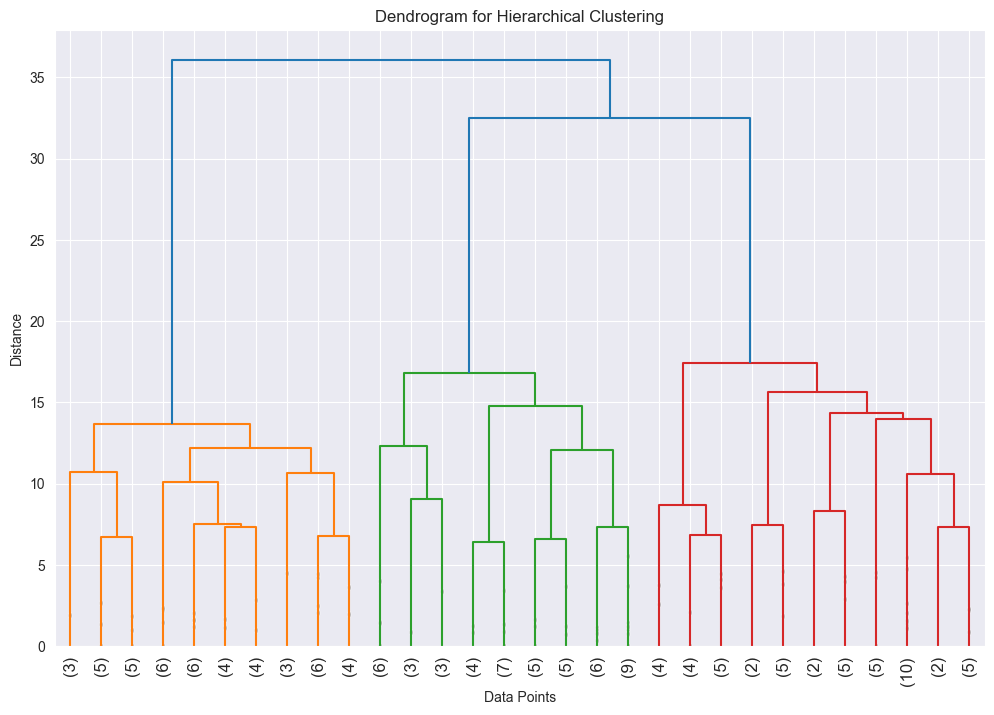

In [69]:
# The data are standardized to have a mean of 0 and a variance of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clusters)

linkage_matrix = linkage(scaled_data, method='ward')

# Plot
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.axhline(y=150, color='r', linestyle='--')
plt.show()

The graph indicates that 3 is the optimal number of clusters.

<h3>Optimal Number of Clusters<h3>

Cluster Distribution:
 Cluster
3    49
2    48
1    46
Name: count, dtype: int64


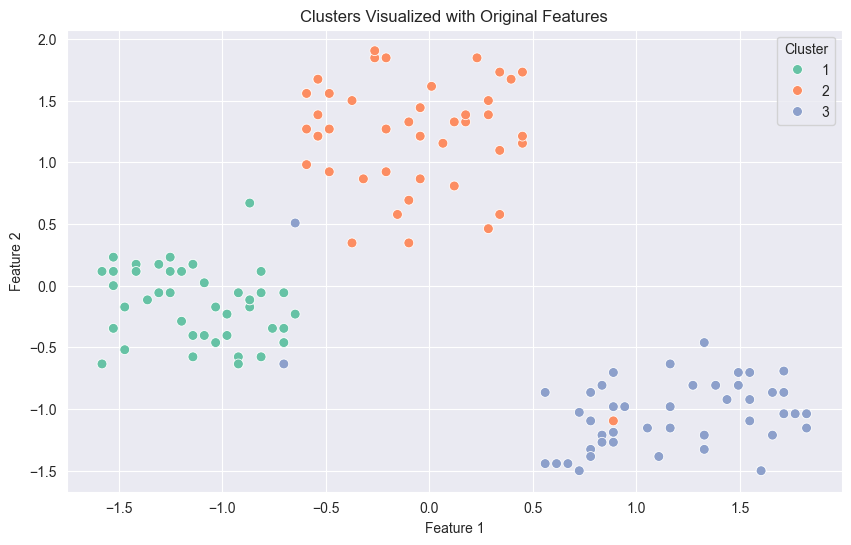

Silhouette Score for Hierarchical Clustering: 0.2371619079589351


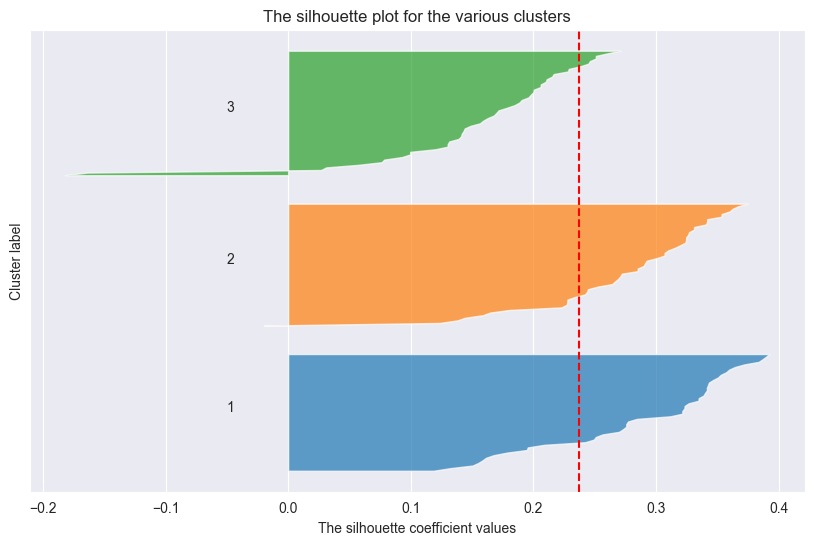

In [ ]:
num_clusters = 3

# Assign cluster labels to each data point
cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add the cluster labels to the original dataframe
df_clusters['Cluster'] = cluster_labels

# Display cluster distribution
print("Cluster Distribution:\n", df_clusters['Cluster'].value_counts())

# Visualize clusters using the first two features as an example
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=cluster_labels, palette='Set2', s=50)
plt.title('Clusters Visualized with Original Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg}")

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

# Plot silhouette analysis
plt.figure(figsize=(10, 6))
y_lower = 10  # Starting point for the silhouette plot

for i in range(1, num_clusters + 1):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("The silhouette plot for the various clusters")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.yticks([])
plt.show()
plt.savefig("results.png")

<h3>Clusters<h3>

In [71]:
print(df_clusters.columns)

Index(['age', 'income', 'phq_tot', 'gad_tot', 'ssba_internet_tot',
       'ssba_drug_tot', 'ssba_alcohol_tot', 'ssba_gambling_tot', 'gender_0',
       'gender_1', 'gender_2', 'gender_3', 'marital_0', 'marital_1',
       'marital_2', 'marital_3', 'marital_4', 'marital_5', 'education_5',
       'education_8', 'education_13', 'education_18', 'education_22',
       'education_25', 'Cluster'],
      dtype='object')


In [72]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                143 non-null    int64  
 1   income             143 non-null    float64
 2   phq_tot            143 non-null    float64
 3   gad_tot            143 non-null    float64
 4   ssba_internet_tot  143 non-null    float64
 5   ssba_drug_tot      143 non-null    float64
 6   ssba_alcohol_tot   143 non-null    float64
 7   ssba_gambling_tot  143 non-null    float64
 8   gender_0           143 non-null    bool   
 9   gender_1           143 non-null    bool   
 10  gender_2           143 non-null    bool   
 11  gender_3           143 non-null    bool   
 12  marital_0          143 non-null    bool   
 13  marital_1          143 non-null    bool   
 14  marital_2          143 non-null    bool   
 15  marital_3          143 non-null    bool   
 16  marital_4          143 non

I divide the dataset according to the three clusters.

In [73]:
# Division of the dataset in three datasets based on the three clusters
cluster_1 = df_clusters[df_clusters['Cluster'] == 1]
cluster_2 = df_clusters[df_clusters['Cluster'] == 2]
cluster_3 = df_clusters[df_clusters['Cluster'] == 3]

cluster_1

,age,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot,gender_0,gender_1,...,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25,Cluster
0,18,38000.0,13.0,11.0,15.0,4.0,2.0,2.0,False,False,...,False,False,False,False,False,True,False,False,False,1
2,31,33000.0,19.0,19.0,5.0,15.0,3.0,3.0,False,True,...,False,False,False,False,False,True,False,False,False,1
4,19,30000.0,11.0,16.0,15.0,8.0,1.0,3.0,False,False,...,False,False,False,False,True,False,False,False,False,1
5,30,25000.0,20.0,19.0,12.0,14.0,3.0,2.0,False,True,...,False,False,False,False,False,False,True,False,False,1
6,35,32000.0,10.0,20.0,9.0,15.0,2.0,0.0,False,False,...,False,False,False,False,True,False,False,False,False,1
13,24,35000.0,18.0,18.0,7.0,14.0,1.0,3.0,False,False,...,False,False,False,False,False,True,False,False,False,1
17,26,29000.0,10.0,18.0,10.0,10.0,3.0,2.0,False,True,...,False,False,False,False,False,True,False,False,False,1
20,25,31000.0,16.0,14.0,8.0,13.0,0.0,0.0,False,False,...,False,False,False,False,True,False,False,False,False,1
23,26,26000.0,11.0,13.0,15.0,14.0,3.0,0.0,False,True,...,False,False,False,False,True,False,False,False,False,1
28,21,39000.0,18.0,21.0,14.0,8.0,1.0,3.0,False,False,...,False,False,False,False,False,True,False,False,False,1


In [74]:
cluster_2

,age,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot,gender_0,gender_1,...,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25,Cluster
9,47,64000.0,4.0,2.0,0.0,2.0,3.0,2.0,True,False,...,False,False,False,False,False,False,False,True,False,2
14,52,62000.0,0.0,3.0,1.0,1.0,1.0,1.0,False,True,...,True,False,False,False,False,False,False,False,True,2
15,38,58000.0,3.0,3.0,0.0,3.0,3.0,3.0,False,True,...,False,False,False,False,False,True,False,False,False,2
19,41,51000.0,1.0,4.0,3.0,3.0,3.0,2.0,True,False,...,False,False,False,False,False,True,False,False,False,2
21,48,56000.0,4.0,1.0,3.0,0.0,1.0,2.0,False,True,...,True,False,False,False,False,False,False,False,True,2
22,38,63000.0,2.0,3.0,1.0,0.0,1.0,0.0,True,False,...,False,False,False,False,False,True,False,False,False,2
25,36,63000.0,4.0,0.0,0.0,1.0,1.0,1.0,False,True,...,False,False,False,False,False,False,True,False,False,2
30,53,66000.0,1.0,2.0,1.0,1.0,0.0,1.0,False,False,...,False,False,False,False,False,False,True,False,False,2
32,40,42000.0,2.0,1.0,0.0,1.0,1.0,0.0,False,False,...,False,False,False,False,False,False,False,True,False,2
37,38,52000.0,1.0,1.0,3.0,2.0,1.0,0.0,True,False,...,False,False,False,False,False,False,True,False,False,2


In [75]:
cluster_3

,age,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot,gender_0,gender_1,...,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25,Cluster
1,62,22000.0,16.0,0.0,3.0,0.0,12.0,6.0,False,True,...,False,False,False,True,False,False,False,False,False,3
3,76,10000.0,18.0,1.0,1.0,3.0,12.0,9.0,False,False,...,False,True,False,False,True,False,False,False,False,3
7,75,17000.0,13.0,1.0,1.0,1.0,8.0,11.0,False,False,...,False,False,False,True,False,False,False,False,False,3
8,35,44800.0,12.0,14.0,10.0,5.0,0.0,3.0,True,False,...,False,False,False,False,True,False,False,False,False,3
10,68,25000.0,16.0,3.0,1.0,1.0,5.0,4.0,False,False,...,False,True,False,False,True,False,False,False,False,3
11,67,12000.0,14.0,1.0,3.0,3.0,12.0,12.0,False,False,...,False,True,False,True,False,False,False,False,False,3
12,68,16000.0,10.0,0.0,1.0,1.0,9.0,14.0,False,False,...,False,False,False,True,False,False,False,False,False,3
16,61,21000.0,14.0,4.0,0.0,2.0,13.0,15.0,False,False,...,False,False,True,True,False,False,False,False,False,3
18,57,21000.0,14.0,3.0,3.0,3.0,8.0,6.0,False,False,...,False,True,False,False,False,True,False,False,False,3
24,62,15000.0,14.0,0.0,0.0,0.0,5.0,4.0,True,False,...,False,True,False,True,False,False,False,False,False,3


<h3>Statistical Analysis</h3>

<h5>Nominal variables</h5>

In [76]:
n_cluster = 3
alpha_corrected = 0.05/n_cluster

In [77]:
# Prepare list to store p-values
p_values = []
p_index = 0

# Function to evaluate p-values
def different(p_value, alpha):
    if p_value < alpha:
        print(f"There are differences: p_value {p_value} < alpha {alpha}\n")
    else:
        print(f"There are no differences: p_value {p_value} > alpha {alpha}\n")


df_clusters['gender'] = df_clusters[['gender_0', 'gender_1', 'gender_2', 'gender_3']].idxmax(axis=1)

# Create contingency table for gender vs. Cluster
contingency_table_gender = pd.crosstab(df_clusters['gender'], df_clusters['Cluster'])
print("Contingency Table (Gender vs. Cluster):\n", contingency_table_gender)

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

# Check if all expected frequencies are >= 5
if (expected < 5).any():
    print("Some expected frequencies are LESS THAN 5. Chi-squared test may not be valid.\n")
else:
    print("All expected frequencies are >= 5. Chi-squared test is valid.\n")

# Append p-value and evaluate significance
p_values.append(p)
print(f"\nChi-squared: {chi2}, p-value: {p_values[p_index]}\n")
different(p_values[p_index], 0.05)

# Compare only Cluster 0 and Cluster 1
contingency_subtable_gender_0_1 = contingency_table_gender.iloc[:, [0, 1]]
print("Contingency Table (Gender vs. Clusters 0 and 1):\n", contingency_subtable_gender_0_1)
p_index += 1
chi2, p, dof, expected = chi2_contingency(contingency_subtable_gender_0_1)
p_values.append(p)
print(f"\nChi-squared: {chi2}, p-value: {p_values[p_index]}\n")
different(p_values[p_index], 0.05)

# Compare only Cluster 0 and Cluster 2
contingency_subtable_gender_0_2 = contingency_table_gender.iloc[:, [0, 2]]
print("Contingency Table (Gender vs. Clusters 0 and 2):\n", contingency_subtable_gender_0_2)
p_index += 1
chi2, p, dof, expected = chi2_contingency(contingency_subtable_gender_0_2)
p_values.append(p)
print(f"\nChi-squared: {chi2}, p-value: {p_values[p_index]}\n")
different(p_values[p_index], alpha_corrected)

# Compare only Cluster 1 and Cluster 2
contingency_subtable_gender_1_2 = contingency_table_gender.iloc[:, [1, 2]]
print("Contingency Table (Gender vs. Clusters 1 and 2):\n", contingency_subtable_gender_1_2)
p_index += 1
chi2, p, dof, expected = chi2_contingency(contingency_subtable_gender_1_2)
p_values.append(p)
print(f"\nChi-squared: {chi2}, p-value: {p_values[p_index]}\n")
different(p_values[p_index], alpha_corrected)

Contingency Table (Gender vs. Cluster):
 Cluster    1   2   3
gender              
gender_0   8  16  14
gender_1  13  18  10
gender_2  11   8  12
gender_3  14   6  13
All expected frequencies are >= 5. Chi-squared test is valid.


Chi-squared: 9.333160964875844, p-value: 0.15569002723661654

There are no differences: p_value 0.15569002723661654 > alpha 0.05

Contingency Table (Gender vs. Clusters 0 and 1):
 Cluster    1   2
gender          
gender_0   8  16
gender_1  13  18
gender_2  11   8
gender_3  14   6

Chi-squared: 7.107466802818173, p-value: 0.0685501879794886

There are no differences: p_value 0.0685501879794886 > alpha 0.05

Contingency Table (Gender vs. Clusters 0 and 2):
 Cluster    1   3
gender          
gender_0   8  14
gender_1  13  10
gender_2  11  12
gender_3  14  13

Chi-squared: 2.0154563133229075, p-value: 0.5692048945949981

There are no differences: p_value 0.5692048945949981 > alpha 0.016666666666666666

Contingency Table (Gender vs. Clusters 1 and 2):
 Cluster   

<h5>Numerical Variables</h5>

 *Kruskal-Wallis test* is used to compare the distributions of three or more independent groups. It is an extension of the *Mann-Whitney U test*, which is used to compare two groups.

* kruskal(*samples, nan_policy='propagate', axis=0, keepdims=False)
    
  Compute the Kruskal-Wallis H-test for independent samples.
  
  The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.
  
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

* mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate', keepdims=False)

    Perform the Mann-Whitney U rank test on two independent samples.

    The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.
  
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [80]:
# Map education levels to ordinal values
education_map = {
    'education_5': 'Elementary school',
    'education_8': 'Middle school',
    'education_13': 'High School',
    'education_18': "Bachelor's Degree",
    'education_22': "Master's Degree",
    'education_25': 'Doctoral Degree'
}

education_ordinal_map = {
    'Elementary school': 1,
    'Middle school': 2,
    'High School': 3,
    "Bachelor's Degree": 4,
    "Master's Degree": 5,
    'Doctoral Degree': 6
}

# Create 'education_level' and 'education_level_ordinal'
df_clusters['education_level'] = None
for column, level in education_map.items():
    df_clusters.loc[df_clusters[column] == 1, 'education_level'] = level
df_clusters['education_level_ordinal'] = df_clusters['education_level'].map(education_ordinal_map)

# Map education levels to ordinal values
education_map = {
    'marital_0': 'Single',
    'marital_1': 'Married',
    'marital_2': 'Divorced',
    'marital_3': 'Widowed',
    'marital_4': 'Separated',
    'marital_5': 'Prefer not to say'
}

education_ordinal_map = {
    'Single': 1,
    'Married': 2,
    'Divorced': 3,
    'Widowed': 4,
    'Separated': 5,
    'Prefer not to say': 6
}

# Create 'education_level' and 'education_level_ordinal'
df_clusters['maritial_level'] = None
for column, level in education_map.items():
    df_clusters.loc[df_clusters[column] == 1, 'maritial_level'] = level
df_clusters['maritial_level_ordinal'] = df_clusters['maritial_level'].map(education_ordinal_map)

# Define ordinal variables
ordinal = ['age', 'income', 'maritial_level_ordinal','education_level_ordinal', 'phq_tot', 'gad_tot',
           'ssba_internet_tot', 'ssba_drug_tot', 'ssba_alcohol_tot', 'ssba_gambling_tot']

# Statistical test parameters
n_cluster = 3
alpha_corrected = 0.05 / n_cluster
p_values = []
p_index = 0

# Function to check and print whether there are significant differences
def different(p_value, alpha):
    if p_value < alpha:
        print(f'There are differences (p-value: {p_value:.4e} < alpha: {alpha:.4e})')
    else:
        print(f'There are no differences (p-value: {p_value:.4e} >= alpha: {alpha:.4e})')

# Analysis loop
for col in ordinal:
    print(f'\nAnalyzing {col}:')

    # Extract data for each cluster
    cluster_3 = df_clusters[df_clusters['Cluster'] == 3][col]
    cluster_1 = df_clusters[df_clusters['Cluster'] == 1][col]
    cluster_2 = df_clusters[df_clusters['Cluster'] == 2][col]

    # Calculate and print statistics
    for cluster, label in zip([cluster_3, cluster_1, cluster_2], ['Cluster 3', 'Cluster 1', 'Cluster 2']):
        median = round(statistics.median(cluster))
        q1 = np.percentile(cluster, 25)
        q3 = np.percentile(cluster, 75)
        print(f'{label} -> Median: {median}, 1st percentile: {q1}, 3rd percentile: {q3}')

    # Kruskal-Wallis test
    print('\nKruskal-Wallis Test:')
    stat, p = kruskal(cluster_3, cluster_1, cluster_2)
    p_values.append(p)
    different(p_values[p_index], 0.05)
    p_index += 1

    # Mann-Whitney U tests
    print('\nMann-Whitney U Tests:')
    for (c1, c2, label) in [(cluster_3, cluster_1, '3-1'),
                            (cluster_3, cluster_2, '3-2'),
                            (cluster_1, cluster_2, '1-2')]:
        stat, p = mannwhitneyu(c1, c2, alternative='two-sided')
        print(f'Cluster {label}:')
        different(p, alpha_corrected)


Analyzing age:
Cluster 3 -> Median: 68, 1st percentile: 61.0, 3rd percentile: 75.0
Cluster 1 -> Median: 26, 1st percentile: 22.25, 3rd percentile: 31.0
Cluster 2 -> Median: 46, 1st percentile: 39.5, 3rd percentile: 51.25

Kruskal-Wallis Test:
There are differences (p-value: 9.4579e-27 < alpha: 5.0000e-02)

Mann-Whitney U Tests:
Cluster 3-1:
There are differences (p-value: 5.8992e-17 < alpha: 1.6667e-02)
Cluster 3-2:
There are differences (p-value: 1.6230e-14 < alpha: 1.6667e-02)
Cluster 1-2:
There are differences (p-value: 6.7530e-17 < alpha: 1.6667e-02)

Analyzing income:
Cluster 3 -> Median: 18000, 1st percentile: 15000.0, 3rd percentile: 22000.0
Cluster 1 -> Median: 33500, 1st percentile: 29000.0, 3rd percentile: 38000.0
Cluster 2 -> Median: 58000, 1st percentile: 52000.0, 3rd percentile: 63000.0

Kruskal-Wallis Test:
There are differences (p-value: 4.2722e-26 < alpha: 5.0000e-02)

Mann-Whitney U Tests:
Cluster 3-1:
There are differences (p-value: 1.5378e-15 < alpha: 1.6667e-02)
Cl